Enter input state (|0>, |1>, |+>, |->) or 'all' to test all:  all



🧬 Quantum Teleportation Simulation for state: |0>
🔍 Circuit Depth: 8
🧮 Gate Count: OrderedDict({'barrier': 4, 'cx': 3, 'measure': 3, 'h': 2, 'cz': 1})
📊 Measurement Results: {'001': 251, '000': 233, '010': 267, '011': 273}


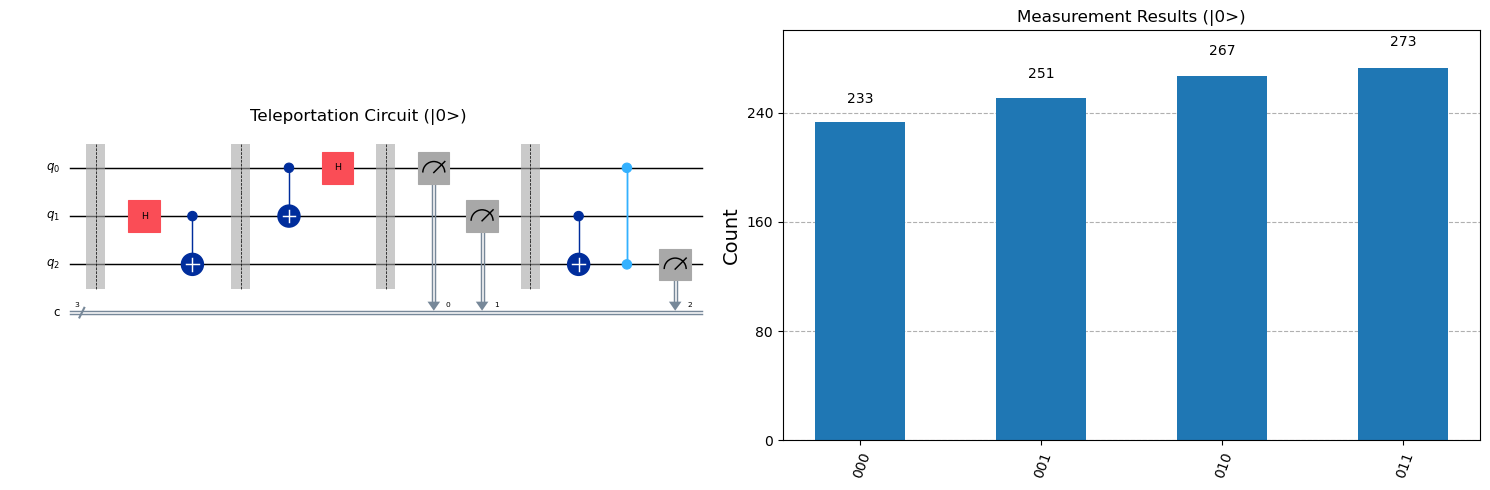


🧬 Quantum Teleportation Simulation for state: |1>
🔍 Circuit Depth: 9
🧮 Gate Count: OrderedDict({'barrier': 4, 'cx': 3, 'measure': 3, 'h': 2, 'x': 1, 'cz': 1})
📊 Measurement Results: {'111': 258, '101': 275, '110': 259, '100': 232}


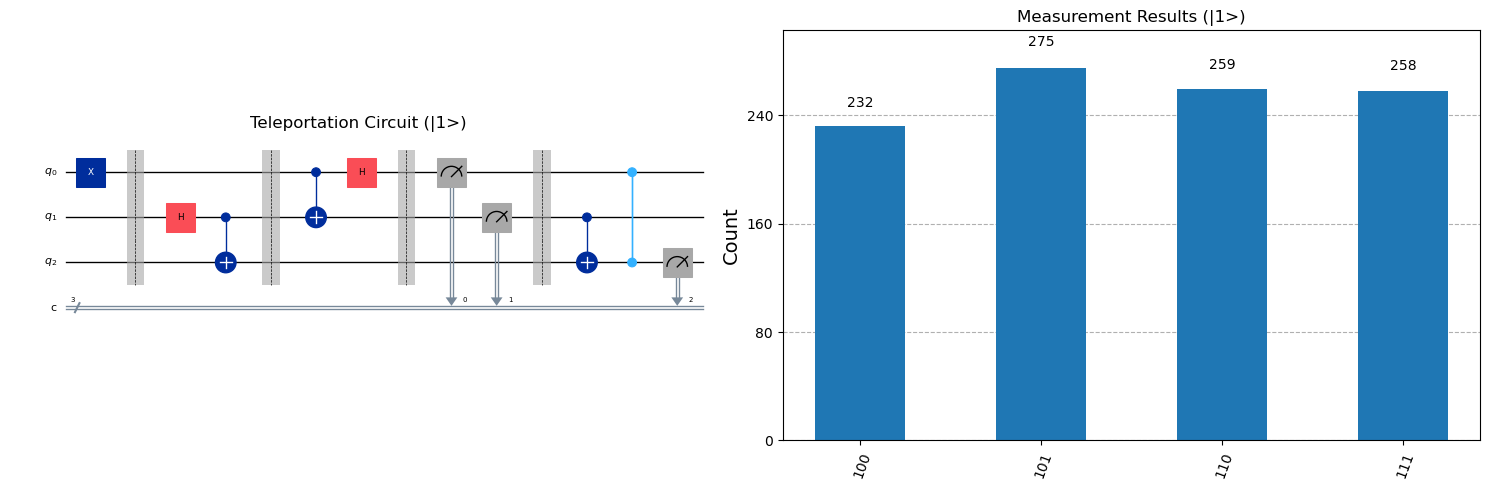


🧬 Quantum Teleportation Simulation for state: |+>
🔍 Circuit Depth: 9
🧮 Gate Count: OrderedDict({'barrier': 4, 'h': 3, 'cx': 3, 'measure': 3, 'cz': 1})
📊 Measurement Results: {'000': 125, '011': 140, '101': 120, '100': 112, '110': 138, '010': 121, '111': 140, '001': 128}


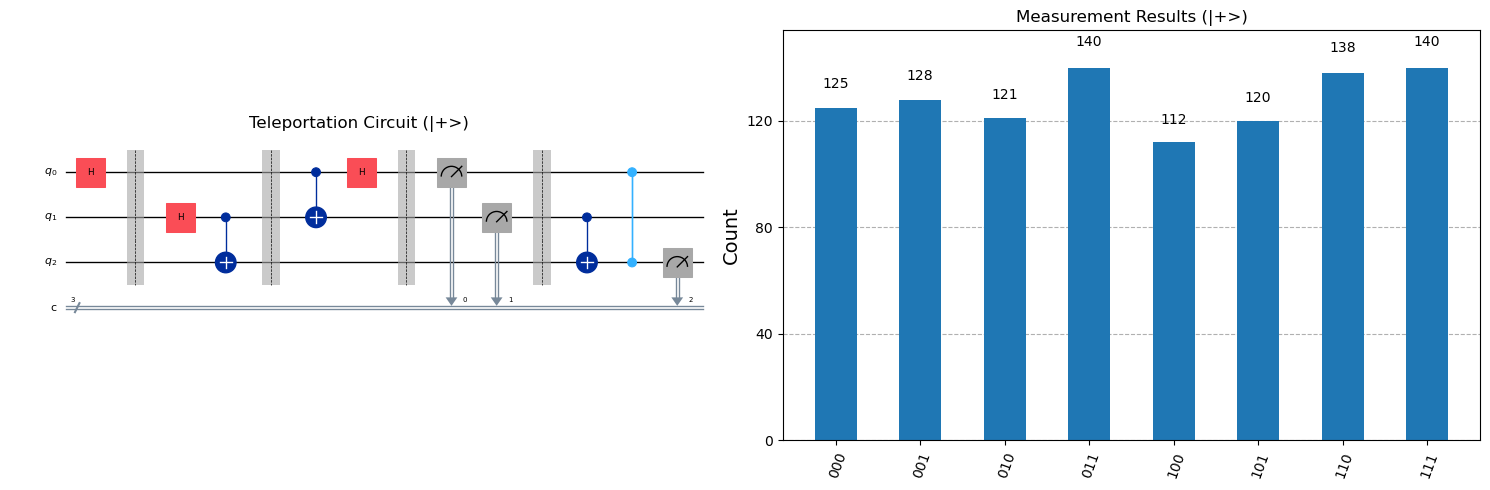


🧬 Quantum Teleportation Simulation for state: |->
🔍 Circuit Depth: 10
🧮 Gate Count: OrderedDict({'barrier': 4, 'h': 3, 'cx': 3, 'measure': 3, 'x': 1, 'cz': 1})
📊 Measurement Results: {'101': 116, '100': 127, '111': 135, '001': 129, '000': 131, '011': 138, '010': 129, '110': 119}


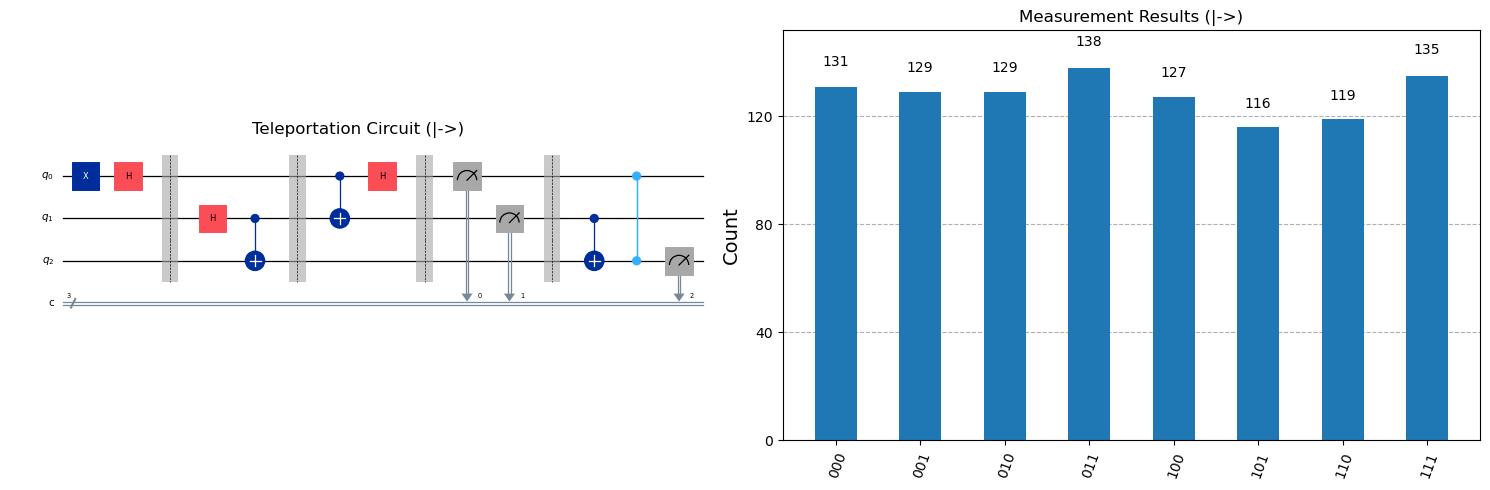

In [1]:
# ✅ Enhanced Quantum Teleportation Simulation
# Author: <Your Name>
# Date: 2025-10-18

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import (
    plot_histogram, plot_bloch_multivector, plot_state_city
)
from qiskit.quantum_info import Statevector, state_fidelity
import matplotlib.pyplot as plt


# -------------------------------
# Step 1: Prepare input state
# -------------------------------
def prepare_input(qc, input_state):
    """Prepare the input qubit (qubit 0) in a desired state."""
    if input_state == '|0>':
        pass
    elif input_state == '|1>':
        qc.x(0)
    elif input_state == '|+>':
        qc.h(0)
    elif input_state == '|->':
        qc.x(0)
        qc.h(0)
    else:
        raise ValueError("Invalid input state. Choose from |0>, |1>, |+>, |->.")
    return qc


# -------------------------------
# Step 2: Create entanglement
# -------------------------------
def entangle(qc):
    """Create entanglement between qubit 1 and 2."""
    qc.h(1)
    qc.cx(1, 2)
    return qc


# -------------------------------
# Step 3: Bell measurement
# -------------------------------
def bell_measurement(qc):
    """Perform Bell measurement on qubits 0 and 1."""
    qc.cx(0, 1)
    qc.h(0)
    return qc


# -------------------------------
# Step 4: Full Teleportation Circuit
# -------------------------------
def teleportation_circuit(input_state, show_plots=True):
    print(f"\n🧬 Quantum Teleportation Simulation for state: {input_state}")

    qc = QuantumCircuit(3, 3)

    # 1️⃣ Prepare input state
    prepare_input(qc, input_state)
    qc.barrier()

    # Save the original state
    original_sv = Statevector.from_instruction(qc)

    # 2️⃣ Create entanglement
    entangle(qc)
    qc.barrier()

    # 3️⃣ Perform Bell measurement
    bell_measurement(qc)
    qc.barrier()

    # Save state before measurement
    sv_before_measure = Statevector.from_instruction(qc)

    # 4️⃣ Measure and apply corrections
    qc.measure([0, 1], [0, 1])
    qc.barrier()
    qc.cx(1, 2)
    qc.cz(0, 2)

    # 5️⃣ Measure Bob’s qubit
    qc.measure(2, 2)

    # 6️⃣ Run simulation
    sim = AerSimulator()
    job = sim.run(qc)
    result = job.result()
    counts = result.get_counts()

    # Circuit info
    print(f"🔍 Circuit Depth: {qc.depth()}")
    print(f"🧮 Gate Count: {qc.count_ops()}")
    print(f"📊 Measurement Results: {counts}")

    # Visualization
    if show_plots:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        qc.draw('mpl', ax=axes[0])
        axes[0].set_title(f'Teleportation Circuit ({input_state})')
        plot_histogram(counts, ax=axes[1])
        axes[1].set_title(f'Measurement Results ({input_state})')
        plt.tight_layout()
        plt.show()

        plot_bloch_multivector(sv_before_measure, title=f"Before Measurement ({input_state})")
        plt.show()

        plot_state_city(original_sv, title=f"Original Input State ({input_state})")
        plt.show()


# -------------------------------
# Step 5: Interactive mode
# -------------------------------
def run_interactive():
    user_choice = input("Enter input state (|0>, |1>, |+>, |->) or 'all' to test all: ").strip()
    if user_choice.lower() == 'all':
        for state in ['|0>', '|1>', '|+>', '|->']:
            teleportation_circuit(state)
    else:
        teleportation_circuit(user_choice)


# -------------------------------
# Step 6: Run program
# -------------------------------
if __name__ == "__main__":
    run_interactive()
